## TensorFlow

Data in CSV is structured data, structured data can be modeled and processed using tensorflow

Step:
 1.Load the data (CSV file) using Pandas.

 2.Build an input pipeline that batches and shuffles rows using tf.data

 3.Map from columns in the CSV to features used to train the model.

 4.Build, train, and evaluate models with Keras.

In [1]:
import sys
print(sys.version)
print(sys.executable)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
D:\anaconda3\python.exe


In [4]:
# global imports

# Import Python extension library (mathematical function library)
import numpy as np

# Import Python data analysis tools
import pandas as pd

# Import Python data visualization library
import seaborn as sns

# Import matplotlib-based plotting tools
import matplotlib.pyplot as plt

# Import warning filter
import warnings

# Set the warning state to 'ignore'
warnings.filterwarnings("ignore")

# Import Python data calculation tool
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

# Import tensorflow model
import tensorflow as tf

# Import feature handling
from tensorflow import feature_column

# Import layers in tensorflow
from tensorflow.keras import layers

# Import dataset cutter
from sklearn.model_selection import train_test_split

# Import data handling function
from __future__ import absolute_import, division, print_function, unicode_literals

In [79]:
# View tf version
tf.__version__ 

'2.10.0'

In [5]:
# Read Dataset
#dataframe = pd.read_csv("xxx")
dataframe = pd.read_csv("../dataset/heartattack-dataset.csv")

dataframe.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thal,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [6]:
# View the basic information of the dataset (name, null value, number of rows, data type, etc.) 
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   trtbps   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exng     303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slp      303 non-null    int64  
 11  ca       303 non-null    int64  
 12  thal     303 non-null    int64  
 13  output   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Split the dataset with a ratio of 8:2
dataframe_val = dataframe.sample(frac=0.2, random_state=1337)
dataframe_val.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thal,output
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1


In [8]:
# Create training data
dataframe_train = dataframe.drop(dataframe_val.index)
dataframe_train.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thal,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [11]:
# View the size of training and test sets
# To ensure fair comparison, the size of the dataset should be consistent with the previous algorithm

print("The size of the training dataset is: ", len(dataframe_train))
print("")
print("The size of the training dataset is: ", len(dataframe_val))

The size of the training dataset is:  242

The size of the training dataset is:  61


In [12]:
# Define a function to create our tensors

# Wrap the dataframe with tf.data
# map from the columns in the dataframe to the features used to train the model using the feature column as a bridge.

# Parameter meaning
# shuffle
# batch_size
#dataframe - df
#dataset - ds

# The function converts each training and verification set into tf.data.Dataset, and then performs shuffling and batch processing on the data

# Create input pipeline
# A utility method to create a tf.data dataset from a Pandas Dataframe
def dataframe_to_dataset(dataframe, shuffle=True, batch_size=32):
  
  # Make a copy of the index and data of this object
  # Deep=True (default): A new object will be created using a copy of the data and index of the calling object.
  dataframe = dataframe.copy()

  # Set Output Label
  labels = dataframe.pop('output')
    
  # Create tensors
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  #dataframe = ds.prefetch(batch_size)
  return ds

In [14]:
# Specify the size of several pieces of data to be trained in the data set (batch_size)

# Modifying the size of the batch_size value can gradually improve the accuracy of the model

# Create tensor with batch size n

batch_size = 5

# Generate new training set 
ds_train = dataframe_to_dataset(dataframe_train, shuffle=True, batch_size=batch_size)

# Generate new validation set
ds_val = dataframe_to_dataset(dataframe_val, shuffle=True, batch_size=batch_size)

In [17]:
# Take age as an example
# The dataset returns a dictionary that maps the column name (from dataframe) to the column value of the row in dataframe

for feature_batch, label_batch in ds_train.take(1):
  # Output all features
  print('Every feature:', list(feature_batch.keys()))
  print('=============')
  # Tensors can be understood as a group of randomly selected data (n means n data if the tensor size is n)
  print('A batch of ages:', feature_batch['age'])
  print('=============')
# n output data corresponding to (one-to-one) tensor data
# n input data correspond to n output data
  print('A batch of output:', label_batch )

Every feature: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalach', 'exng', 'oldpeak', 'slp', 'ca', 'thal']
A batch of ages: tf.Tensor([66 51 44 56 43], shape=(5,), dtype=int64)
A batch of output: tf.Tensor([0 1 1 1 1], shape=(5,), dtype=int64)


In [18]:
# Batch Characteristic Columns
# Different types of data correspond to different processing methods
example_batch = next(iter(ds_train))[0]

# Create characteristic columns and convert batch data
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())

### 1. Continuous data (5)

In [19]:
# age
age_count = feature_column.numeric_column('age')

demo(age_count)

[[43.]
 [54.]
 [41.]
 [57.]
 [68.]]


In [20]:
# trtbps
trtbps_count = feature_column.numeric_column('trtbps')

demo(trtbps_count)

[[132.]
 [108.]
 [130.]
 [150.]
 [180.]]


In [21]:
# chol
chol_count = feature_column.numeric_column('chol')

demo(chol_count)

[[247.]
 [309.]
 [214.]
 [276.]
 [274.]]


In [22]:
# thalach
thalach_count = feature_column.numeric_column('thalach')

demo(thalach_count)

[[143.]
 [156.]
 [168.]
 [112.]
 [150.]]


In [24]:
# oldpeak
oldpeak_count = feature_column.numeric_column('oldpeak')

demo(oldpeak_count)

[[0.1]
 [0. ]
 [2. ]
 [0.6]
 [1.6]]


### 2. Bucketized data (age)

In [36]:
# Manually divide age into multiple groups
age = feature_column.numeric_column('age')
age_buckets = feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
demo(age_buckets)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### 3. Discontinuous data (8)

In [25]:
# sex
sex_type = feature_column.categorical_column_with_vocabulary_list(
      'sex', [0, 1])

sex_type_one_hot = feature_column.indicator_column(sex_type)
demo(sex_type_one_hot)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [37]:
# fbs
fbs_type = feature_column.categorical_column_with_vocabulary_list(
      'fbs', [0, 1])

fbs_type_one_hot = feature_column.indicator_column(fbs_type)
demo(fbs_type_one_hot)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [26]:
# exng
exng_type = feature_column.categorical_column_with_vocabulary_list(
      'exng', [0, 1])

exng_type_one_hot = feature_column.indicator_column(exng_type)
demo(exng_type_one_hot)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [27]:
# cp
cp_type = feature_column.categorical_column_with_vocabulary_list(
      'cp', [0, 1, 2, 3])

cp_type_one_hot = feature_column.indicator_column(cp_type)
demo(cp_type_one_hot)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [28]:
# restecg
restecg_type = feature_column.categorical_column_with_vocabulary_list(
      'restecg', [0, 1, 2])

restecg_type_one_hot = feature_column.indicator_column(restecg_type)
demo(restecg_type_one_hot)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [29]:
# slp
slp_type = feature_column.categorical_column_with_vocabulary_list(
      'slp', [0, 1, 2])

slp_type_one_hot = feature_column.indicator_column(slp_type)
demo(slp_type_one_hot)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [30]:
# ca
ca_type = feature_column.categorical_column_with_vocabulary_list(
      'ca', [0, 1, 2, 3])

ca_type_one_hot = feature_column.indicator_column(ca_type)
demo(ca_type_one_hot)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [31]:
# thal
thal_type = feature_column.categorical_column_with_vocabulary_list(
      'thal', [1, 2, 3])

thal_type_one_hot = feature_column.indicator_column(thal_type)
demo(thal_type_one_hot)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [38]:
# Create an empty feature column
feature_columns = []

# Continuous data (5)
# numeric cols
for header in ['age','trtbps','chol','thalach','oldpeak']:
# for header in ['trtbps','chol','thalach','oldpeak']:
  feature_columns.append(feature_column.numeric_column(header))

indicator_column_names = ['sex','cp','fbs','restecg','exng','slp','ca','thal']
for col_name in indicator_column_names:
  categorical_column = feature_column.categorical_column_with_vocabulary_list(
      col_name, dataframe[col_name].unique())
  indicator_column = feature_column.indicator_column(categorical_column)
  feature_columns.append(indicator_column)

    
# # Bucketized data (age)
# # bucketized cols
# age = feature_column.numeric_column('age')
# age_buckets = feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
# feature_columns.append(age_buckets)

# Discontinuous data (8)
# indicator_columns

In [39]:
# Use DenseFeatures layer to input feature columns into Keras model
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [66]:
# Create tensor with batch size of 32

# Set tensor to 32
batch_size = 32

# Generate new training set 
ds_train = dataframe_to_dataset(dataframe_train, shuffle=True, batch_size=batch_size)

# Generate new validation set
ds_val = dataframe_to_dataset(dataframe_val, shuffle=True, batch_size=batch_size)

In [69]:
# Creating, compiling, and training models
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(ds_train,
          validation_data=ds_val,
          # Set cycle times of training process
          epochs=50)

Epoch 1/50
8/8 [==============================] - 2s 81ms/step - loss: 12.1008 - accuracy: 0.4669 - val_loss: 8.7659 - val_accuracy: 0.3770
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 5.1810 - accuracy: 0.4959 - val_loss: 2.4431 - val_accuracy: 0.6230
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 4.1343 - accuracy: 0.4917 - val_loss: 2.1293 - val_accuracy: 0.4754
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 2.5413 - accuracy: 0.6240 - val_loss: 1.6968 - val_accuracy: 0.7049
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 2.2718 - accuracy: 0.6446 - val_loss: 1.8028 - val_accuracy: 0.6885
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 2.4842 - accuracy: 0.6198 - val_loss: 1.8066 - val_accuracy: 0.7049
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 2.3097 - accuracy: 0.6033 - val_loss: 1.5113 - val_accuracy: 0.7213
Epoch 8/50
8/8 [================

Epoch 37/50
8/8 [==============================] - 0s 5ms/step - loss: 0.4158 - accuracy: 0.8099 - val_loss: 0.4851 - val_accuracy: 0.7869
Epoch 38/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3521 - accuracy: 0.8347 - val_loss: 0.5450 - val_accuracy: 0.8361
Epoch 39/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4258 - accuracy: 0.8099 - val_loss: 0.7031 - val_accuracy: 0.6885
Epoch 40/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4685 - accuracy: 0.7355 - val_loss: 0.5031 - val_accuracy: 0.8197
Epoch 41/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4074 - accuracy: 0.8099 - val_loss: 0.4541 - val_accuracy: 0.8361
Epoch 42/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3841 - accuracy: 0.7851 - val_loss: 0.4361 - val_accuracy: 0.7869
Epoch 43/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4162 - accuracy: 0.7975 - val_loss: 0.4669 - val_accuracy: 0.8197
Epoch 44/50
8/8 [==========

In [70]:
# output test results

loss, accuracy = model.evaluate(ds_val)

# Lost of Tensorflow model
# print("Lost of tensorflow: ", loss)

# Accuracy of Tensorflow model
print("Accuracy of tensorflow: ", accuracy)
# print("Accuracy", round(accuracy, 16))

2/2 [==============================] - 0s 6ms/step - loss: 0.5499 - accuracy: 0.8361
Accuracy of tensorflow:  0.8360655903816223


### Influence of epochs value on accuracy

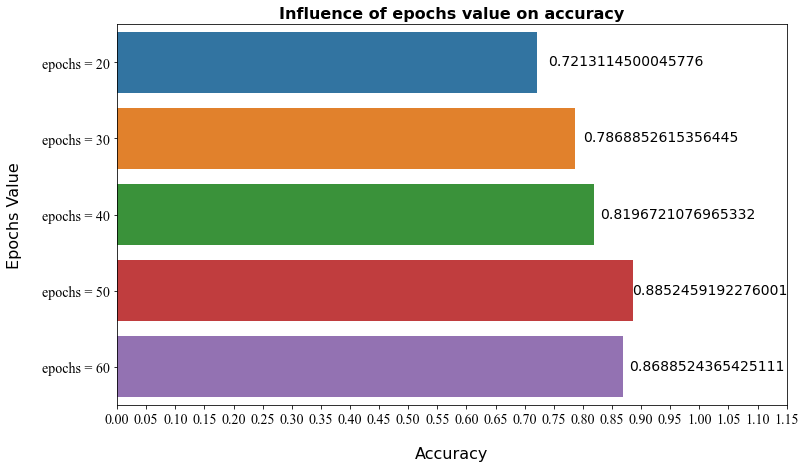

In [72]:
tensorflow_epochs_accuracy = pd.DataFrame({
    'Epochs' : [
                 'epochs = 20', 
                 'epochs = 30', 
                 'epochs = 40', 
                 'epochs = 50', 
                 'epochs = 60'
                ],
    'Acc' : [
               0.7213114500045776,
               0.7868852615356445,
               0.8196721076965332,
               0.8852459192276001,
               0.8688524365425111

              ]
})

plt.figure(figsize = (12, 7))
sns.barplot(x = 'Acc', y = 'Epochs', data = tensorflow_epochs_accuracy)

# Set the title of the chart
plt.title('Influence of epochs value on accuracy',fontsize = 16, fontweight = 'bold', alpha = 1)

# Set the label of the axis
plt.xlabel('Accuracy', fontsize = 16, labelpad=20)
plt.ylabel('Epochs Value', fontsize = 16, labelpad=20)

# Set Axis Precision
my_x_ticks = np.arange(0.00, 1.20, 0.05)
plt.xticks(my_x_ticks)

# Set Axis Label Text Size
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)

# Display data
plt.text(0.74, 0.04, '0.7213114500045776', size = 14)
plt.text(0.80, 1.04, '0.7868852615356445', size = 14)
plt.text(0.83, 2.04, '0.8196721076965332', size = 14)
plt.text(0.885, 3.04, '0.8852459192276001', size = 14)
plt.text(0.88, 4.04, '0.8688524365425111', size = 14)

# Display chart
plt.show()

### Influence of batchsize value on accuracy

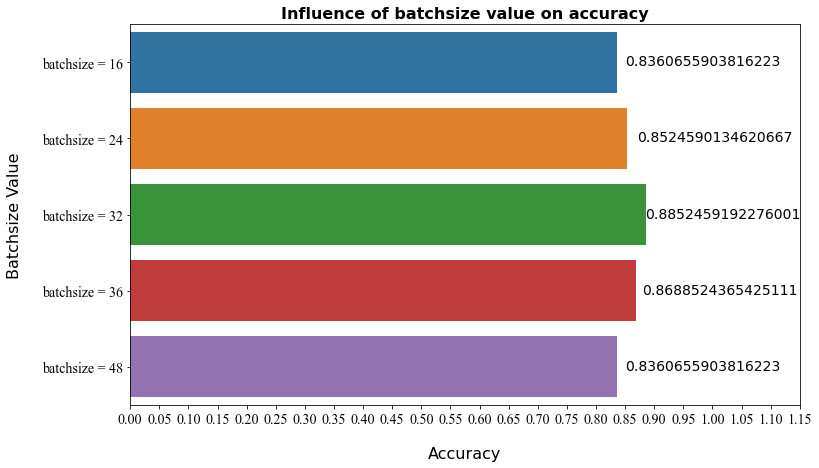

In [78]:
tensorflow_batchsize_accuracy = pd.DataFrame({
    'Batchsize' : [
                 'batchsize = 16', 
                 'batchsize = 24', 
                 'batchsize = 32', 
                 'batchsize = 36', 
                 'batchsize = 48'
                ],
    'Acc' : [
               0.8360655903816223,
               0.8524590134620667,
               0.8852459192276001,
               0.8688524365425111,
               0.8360655903816223,

              ]
})

plt.figure(figsize = (12, 7))
sns.barplot(x = 'Acc', y = 'Batchsize', data = tensorflow_batchsize_accuracy)

# Set the title of the chart
plt.title('Influence of batchsize value on accuracy',fontsize = 16, fontweight = 'bold', alpha = 1)

# Set the label of the axis
plt.xlabel('Accuracy', fontsize = 16, labelpad=20)
plt.ylabel('Batchsize Value', fontsize = 16, labelpad=20)

# Set Axis Precision
my_x_ticks = np.arange(0.00, 1.20, 0.05)
plt.xticks(my_x_ticks)

# Set Axis Label Text Size
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)

# Display data
plt.text(0.85, 0.04, '0.8360655903816223', size = 14)
plt.text(0.87, 1.04, '0.8524590134620667', size = 14)
plt.text(0.885, 2.04, '0.8852459192276001', size = 14)
plt.text(0.88, 3.04, '0.8688524365425111', size = 14)
plt.text(0.85, 4.04, '0.8360655903816223', size = 14)

# Display chart
plt.show()

### Conclusion: The maximum accuracy of TensorFlow is 0.8852459192276001